In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
# default MNIST training and validation is 85-15, uncomment if manual is needed
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# default MNIST training and validation is 85-15, uncomment if manual is needed
# Split the training data into training and validation sets (80-20 split)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
# Set epochs
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2776 - accuracy: 0.9222
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1235 - accuracy: 0.9639
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0847 - accuracy: 0.9749
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0621 - accuracy: 0.9818
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0472 - accuracy: 0.9857
313/313 - 1s - loss: 0.0775 - accuracy: 0.9778 - 719ms/epoch - 2ms/step

Test accuracy: 0.9778000116348267


1/1 [==============================] - 0s 115ms/step


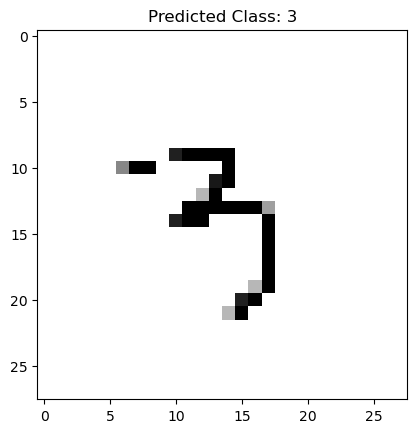

Predicted Class: 3


In [21]:
img_path = 'C:/Users/dev/Downloads/3.png'  # Replace with the path to your image
img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)

# Invert colors if the background is white and digit is black
img_array = 255 - img_array

# Normalize the image to match the training data
img_array = img_array / 255.0

# Reshape the image to match the input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Display the image and predicted class
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

print(f'Predicted Class: {predicted_class}')